In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import folium
from sklearn import preprocessing
import geopandas as gpd
import matplotlib.colors as colors
import matplotlib.colors as colors
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
#from helpers import *
from ipywidgets import SelectMultiple, RadioButtons, interact, Layout
%load_ext autoreload
%autoreload 2

In [2]:
import plotly.graph_objects as go

In [3]:
import networkx as nx

## Trade Network

In [4]:
mat = pd.read_pickle("pickle/trade_matrix.pkl")

In [5]:
china = mat[(mat.reset_index().From=='China').values]

In [6]:
china = china.sort_values(['Value'], ascending=False)

In [7]:
top50cn = china.iloc[:50]

In [8]:
countries = set(top50cn.reset_index().From.values).union(top50cn.reset_index().To.values)

In [9]:
G = nx.DiGraph()

In [10]:
G.add_nodes_from(countries)

In [11]:
G.add_weighted_edges_from(top50cn.reset_index().values)

In [12]:
sum_from = mat.groupby('From').sum()
sum_to = mat.groupby('To').sum()
tot = sum_from.merge(sum_to.Value, how='outer', left_index=True, right_index=True).sum(axis=1).sort_values(ascending=False)
#color = tot.divide(tot.max())

In [13]:
data = top50cn.Value.reset_index().drop('From', axis=1).set_index('To')
to = pd.Series(data['Value'], index=data.index)

In [14]:
nx.set_node_attributes(G, tot, 'Total')
nx.set_node_attributes(G, to, 'To')

In [15]:
m = max([G[u][v]['weight'] for u,v in G.edges()])
mto = max([G.nodes[n]["To"] for n in G.nodes()])
#[G[u][v]['weight']/m*100 for u,v in G.edges()]

C:\Users\Francesco\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\Francesco\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



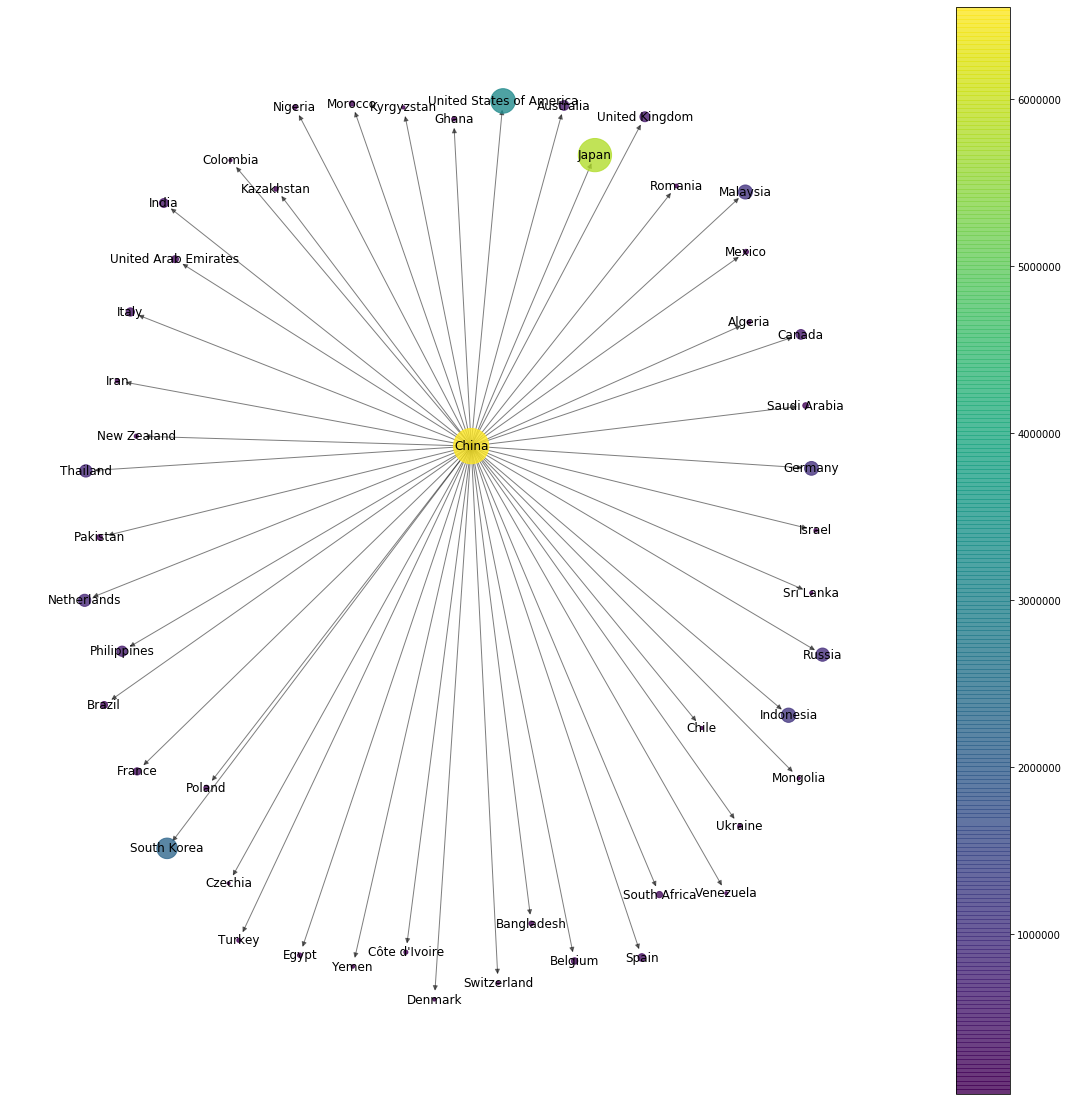

In [16]:
plt.figure(figsize=(20,20)) 
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.5,edgelist=G.edges(), width=1, with_labels=True)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), with_labels=True, node_color=[G.nodes[n]["To"] for n in G.nodes()],
                            node_size=[G.nodes[n]["To"] for n in G.nodes()]/mto*5000, alpha=0.8, node_shape = '.')
labels = nx.draw_networkx_labels(G,pos)
plt.colorbar(nc)
plt.axis('off')
plt.show()

In [59]:
nx.set_node_attributes(G, pos, 'pos')
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Greens',
        reversescale=True,
        color=[],
        size=[],
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [60]:
node_color = []
node_text = []
node_size = []
for node in G.nodes():
    node_text.append(node+':\n Value imported '+str(int(G.nodes()[node]['To'])))
    node_color.append(G.nodes()[node]['To'])
    node_size.append(G.nodes()[node]['To']/mto*50)

node_trace.marker.color = node_color
node_trace.marker.size = node_size
node_trace.text = node_text

In [62]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()